In [1]:
#Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the features dataset
features=pd.read_csv('D:/SHIVAM/Imarticus-PGA/Capstone Project- I/Final/kddcup.names')

In [4]:
#Checking the features dataset
features

,back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,...,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
0,duration: continuous.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,protocol_type: symbolic.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,service: symbolic.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,flag: symbolic.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,src_bytes: continuous.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,dst_bytes: continuous.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,land: symbolic.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,wrong_fragment: continuous.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,urgent: continuous.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,hot: continuous.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Appending columns to the dataset and adding a new column name ‘target’ to the dataset.
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')

print(len(columns)) #print(columns)

42


In [6]:
#Loading the ‘attack_types’ file.
attack_types= pd.read_csv('D:/SHIVAM/Imarticus-PGA/Capstone Project- I/Final/training_attack_types.txt')

In [7]:
#Checking the attack_types file
attack_types

,back dos
0,buffer_overflow u2r
1,ftp_write r2l
2,guess_passwd r2l
3,imap r2l
4,ipsweep probe
5,land dos
6,loadmodule u2r
7,multihop r2l
8,neptune dos
9,nmap probe


In [12]:
#Creating a dictionary of attack_types
attack_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [19]:
#Loading the main dataset
path = "D:/SHIVAM/Imarticus-PGA/Capstone Project- I/Final/kddcup.data_10_percent_corrected"
df = pd.read_csv(path,names=columns)
#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [20]:
#Checking shape of data
df.shape

(494021, 43)

# DATA PRE-PROCESSING

In [25]:
#Checking for null values & if available getting its sum
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [28]:
#Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['protocol_type', 'flag', 'service']

# CATEGORICAL FEATURES DISTRIBUTION

In [29]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

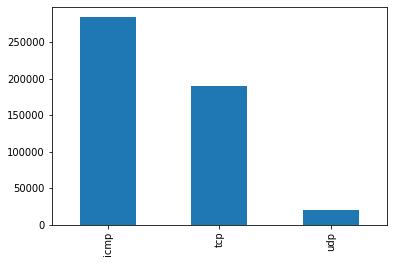

In [30]:
bar_graph('protocol_type')

#### Protocol type: We notice that ICMP is the most in the used data, then TCP and almost 20000 packets of UDP type

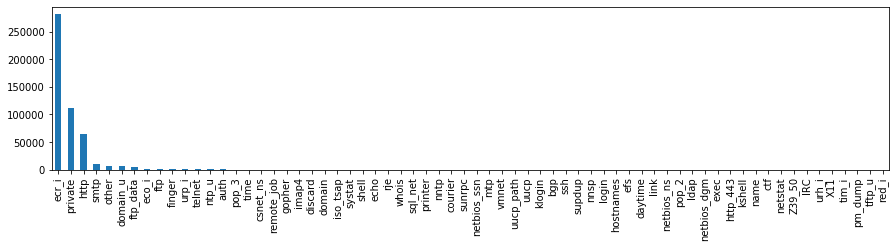

In [31]:
plt.figure(figsize=(15,3))
bar_graph('service')

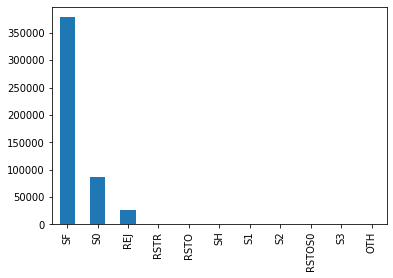

In [32]:
bar_graph('flag')

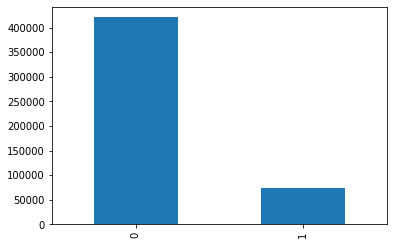

In [33]:
bar_graph('logged_in')

#### logged_in (1 if successfully logged in; 0 otherwise): We notice that just 70000 packets are successfully logged in.

# TARGET FEATURE DISTRIBUTION

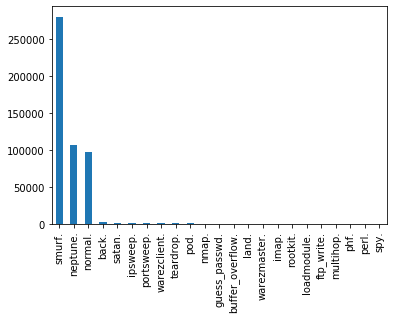

In [34]:
bar_graph('target')

#### Attack Type(The attack types grouped by attack, it's what we will predict)

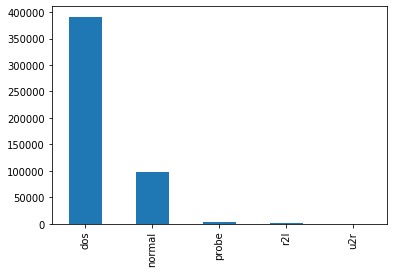

In [35]:
bar_graph('Attack Type')

# DATA CORRELATION

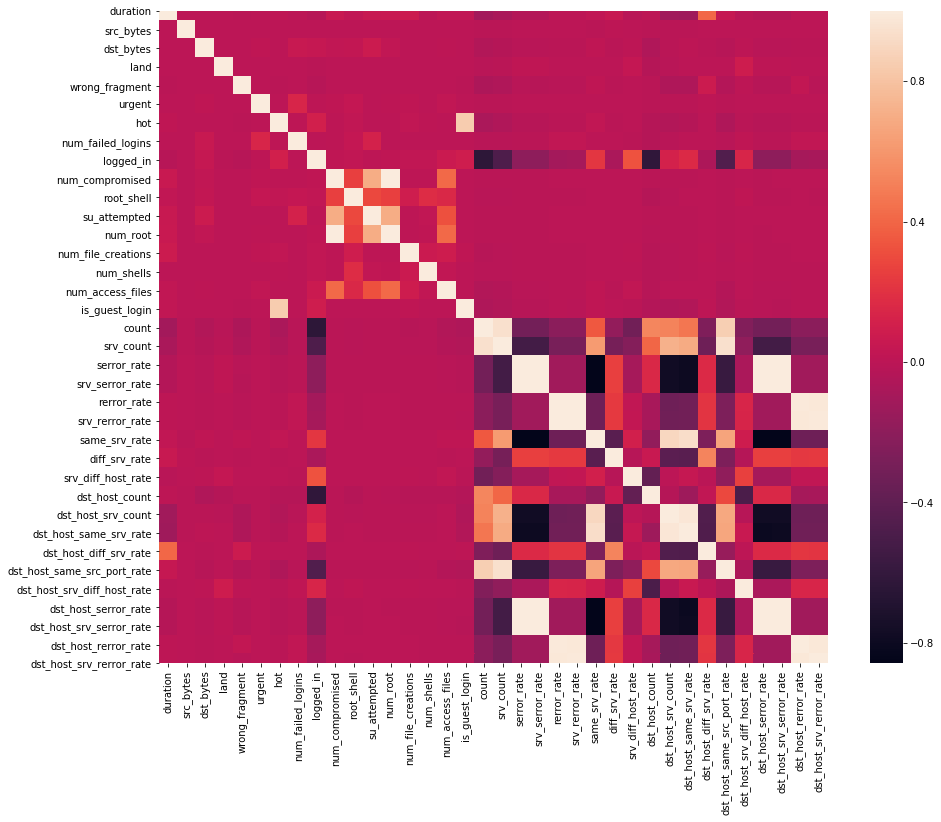

In [36]:
df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [37]:
#Dropping highly correlated columns
df.drop('num_root', axis = 1, inplace = True)
df.drop('srv_serror_rate', axis = 1, inplace = True)
df.drop('srv_rerror_rate', axis = 1, inplace = True)
df.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)
df.drop('dst_host_serror_rate', axis = 1, inplace = True)
df.drop('dst_host_rerror_rate', axis = 1, inplace = True)
df.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True)
df.drop('dst_host_same_srv_rate', axis = 1, inplace = True)

In [41]:
#Checking the dataset shape
df.shape

(494021, 33)

# FEATURE MAPPING

In [42]:
df['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [43]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [44]:
df['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [45]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [46]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,http,0,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,http,0,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,http,0,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,http,0,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,http,0,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [47]:
#Remove irrelevant features such as ‘service’ before modelling
df.drop('service',axis = 1,inplace= True)

In [49]:
#Check final shape before modelling
df.shape

(494021, 32)

# MODELLING

In [50]:
#Importing libraries and splitting the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [51]:
df = df.drop(['target',], axis=1)
print(df.shape)

# Target variable and train set
y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(494021, 31)
(330994, 30) (163027, 30)
(330994, 1) (163027, 1)


### GAUSSIAN NAIVE BAYES

In [52]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [55]:
clfg = GaussianNB()
clfg.fit(X_train, y_train.values.ravel())
y_test_pred = clfg.predict(X_train)
print("Train score is:", clfg.score(X_train, y_train))
print("Test score is:",clfg.score(X_test,y_test))

Train score is: 0.8795114110829804
Test score is: 0.8790384414851528


### DECISION TREE

In [56]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier

In [57]:
clfd = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
clfd.fit(X_train, y_train.values.ravel())
y_test_pred = clfd.predict(X_train)
print("Train score is:", clfd.score(X_train, y_train))
print("Test score is:",clfd.score(X_test,y_test))

Train score is: 0.9905829108684749
Test score is: 0.9905230421954646


### LOGISTIC REGRESSION

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
clfl = LogisticRegression(max_iter=1200000)
clfl.fit(X_train, y_train.values.ravel())
y_test_pred = clfl.predict(X_train)
print("Train score is:", clfl.score(X_train, y_train))
print("Test score is:",clfl.score(X_test,y_test))

Train score is: 0.9932083361027693
Test score is: 0.993234249541487


### SUPPORT VECTOR MACHINE

In [64]:
from sklearn.svm import SVC

In [65]:
clfs = SVC(gamma = 'scale')
clfs.fit(X_train, y_train.values.ravel())
y_test_pred = clfs.predict(X_train)
print("Train score is:", clfs.score(X_train, y_train))
print("Test score is:",clfs.score(X_test,y_test))

Train score is: 0.9987552644458811
Test score is: 0.9987916112055059


## TRAINING ACCURACY COMPARISON

<BarContainer object of 4 artists>

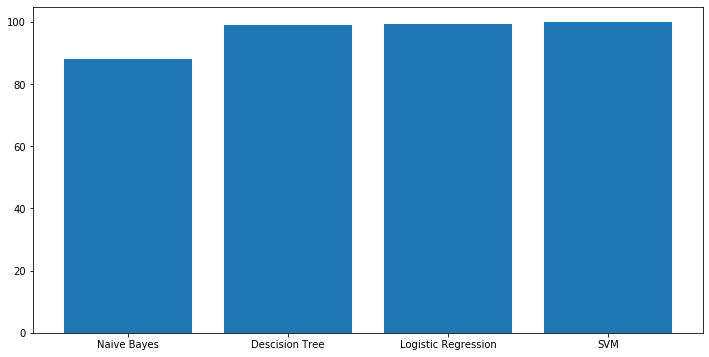

In [71]:
names = ['Naive Bayes','Descision Tree','Logistic Regression','SVM']
values = [87.951,99.058,99.320,99.875]
f=plt.figure(figsize=(12,6))
plt.bar(names,values)

## TESTING ACCURACY COMPARISON

<BarContainer object of 4 artists>

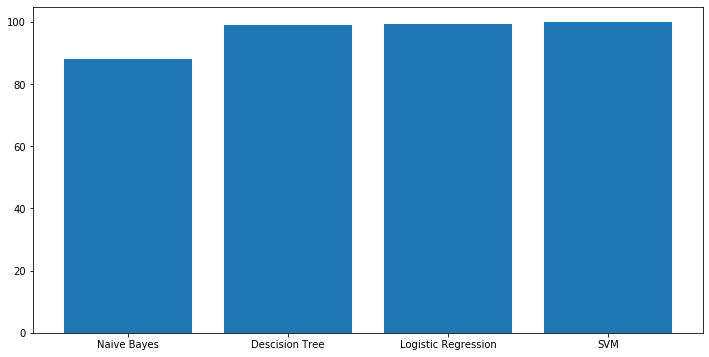

In [72]:
names = ['Naive Bayes','Descision Tree','Logistic Regression','SVM']
values = [87.903,99.052,99.323,99.879]
f=plt.figure(figsize=(12,6))
plt.bar(names,values)

# THANK YOU!